# Worldwide COVID-19 Data (Using QGIS) - A77310

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/19/20  4/20/20  4/21/20  4/22/20  \
0        0        0        0  ...      996     1026     1092     1176   
1        0        0        0  ...      562      584      609      634   
2        0        0        0  ...     2629     2718     2811     2910   
3        0        0        0  ...      713      717      717      723   
4        0        0        0  ...       24       24       24       25   

   4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  
0     1279     1351     1463     1531     1703     1828  
1      663      678      712      726      736      750  
2     3007     3127     3256     3382     3517     3649  
3      723      731      738      738      743      743  
4       25       25       25       26       27       27  

[5 rows x 102 columns]

# Data Handling for Easier Presentation

We're gonna handle the data a bit for easier graph managing. However, we're preserving the initial dataframe for QGIS use later.

In [2]:
data = df.drop(columns=['Province/State', 'Lat', 'Long'])
data[data.duplicated(['Country/Region'])]

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
9         Australia        0        0        0        0        3        4   
10        Australia        0        0        0        0        0        0   
11        Australia        0        0        0        0        0        0   
12        Australia        0        0        0        0        0        0   
13        Australia        0        0        0        0        0        0   
..              ...      ...      ...      ...      ...      ...      ...   
250  United Kingdom        0        0        0        0        0        0   
251  United Kingdom        0        0        0        0        0        0   
256     Netherlands        0        0        0        0        0        0   
258  United Kingdom        0        0        0        0        0        0   
259          France        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  4/19/20  4/20/20  4/21/20  4/22/20  \
9          4        4        4  ...     2957     2963     2969     2971   
10         0        0        0  ...       28       28       28       28   
11         0        1        3  ...     1019     1019     1024     1024   
12         0        0        0  ...      435      435      437      438   
13         0        0        0  ...      195      200      201      205   
..       ...      ...      ...  ...      ...      ...      ...      ...   
250        0        0        0  ...        4        5        5        5   
251        0        0        0  ...       11       11       11       11   
256        0        0        0  ...        5        5        5        5   
258        0        0        0  ...       11       11       11       11   
259        0        0        0  ...        1        1        1        1   

     4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  
9       2976     2982     2994     3002     3004     3016  
10        28       28       28       28       28       28  
11      1026     1026     1026     1030     1033     1034  
12       438      438      438      438      438      438  
13       207      207      207      212      214      218  
..       ...      ...      ...      ...      ...      ...  
250        5        5        6        6        6        6  
251       11       11       11       11       12       12  
256        5        5        5        5        5        5  
258       12       13       13       13       13       13  
259        1        1        1        1        1        1  

[79 rows x 99 columns]

In [3]:
data = data.groupby(['Country/Region']).sum().reset_index()
data.set_index("Country/Region", inplace=True)

data

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                             
Afghanistan               0        0        0        0        0        0   
Albania                   0        0        0        0        0        0   
Algeria                   0        0        0        0        0        0   
Andorra                   0        0        0        0        0        0   
Angola                    0        0        0        0        0        0   
...                     ...      ...      ...      ...      ...      ...   
West Bank and Gaza        0        0        0        0        0        0   
Western Sahara            0        0        0        0        0        0   
Yemen                     0        0        0        0        0        0   
Zambia                    0        0        0        0        0        0   
Zimbabwe                  0        0        0        0        0        0   

                    1/28/20  1/29/20  1/30/20  1/31/20  ...  4/19/20  4/20/20  \
Country/Region                                          ...                     
Afghanistan               0        0        0        0  ...      996     1026   
Albania                   0        0        0        0  ...      562      584   
Algeria                   0        0        0        0  ...     2629     2718   
Andorra                   0        0        0        0  ...      713      717   
Angola                    0        0        0        0  ...       24       24   
...                     ...      ...      ...      ...  ...      ...      ...   
West Bank and Gaza        0        0        0        0  ...      437      449   
Western Sahara            0        0        0        0  ...        6        6   
Yemen                     0        0        0        0  ...        1        1   
Zambia                    0        0        0        0  ...       61       65   
Zimbabwe                  0        0        0        0  ...       25       25   

                    4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  \
Country/Region                                                             
Afghanistan            1092     1176     1279     1351     1463     1531   
Albania                 609      634      663      678      712      726   
Algeria                2811     2910     3007     3127     3256     3382   
Andorra                 717      723      723      731      738      738   
Angola                   24       25       25       25       25       26   
...                     ...      ...      ...      ...      ...      ...   
West Bank and Gaza      466      474      480      484      342      342   
Western Sahara            6        6        6        6        6        6   
Yemen                     1        1        1        1        1        1   
Zambia                   70       74       76       84       84       88   
Zimbabwe                 28       28       28       29       31       31   

                    4/27/20  4/28/20  
Country/Region                        
Afghanistan            1703     1828  
Albania                 736      750  
Algeria                3517     3649  
Andorra                 743      743  
Angola                   27       27  
...                     ...      ...  
West Bank and Gaza      342      343  
Western Sahara            6        6  
Yemen                     1        1  
Zambia                   88       95  
Zimbabwe                 32       32  

[185 rows x 98 columns]

Now, to visualize how many COVID cases have been reported total in each country, we'll make a sum of all columns and store them in another dataframe but only after summing all the duplicates.

In [4]:
sumdata = data.sum(axis = 1)
sumdata = sumdata.sort_values(ascending=True)

sumdata

Country/Region
Yemen                          19
Sao Tome and Principe          96
South Sudan                   122
Western Sahara                130
Papua New Guinea              135
                           ...   
Germany                   4207135
Spain                     5648057
Italy                     5730559
China                     6519038
US                       18496878
Length: 185, dtype: int64

As we can see, the growth of the number of infected in relation to the country appears to scale exponentially with Population Density, so we'll build a graph with a logarithmic scale

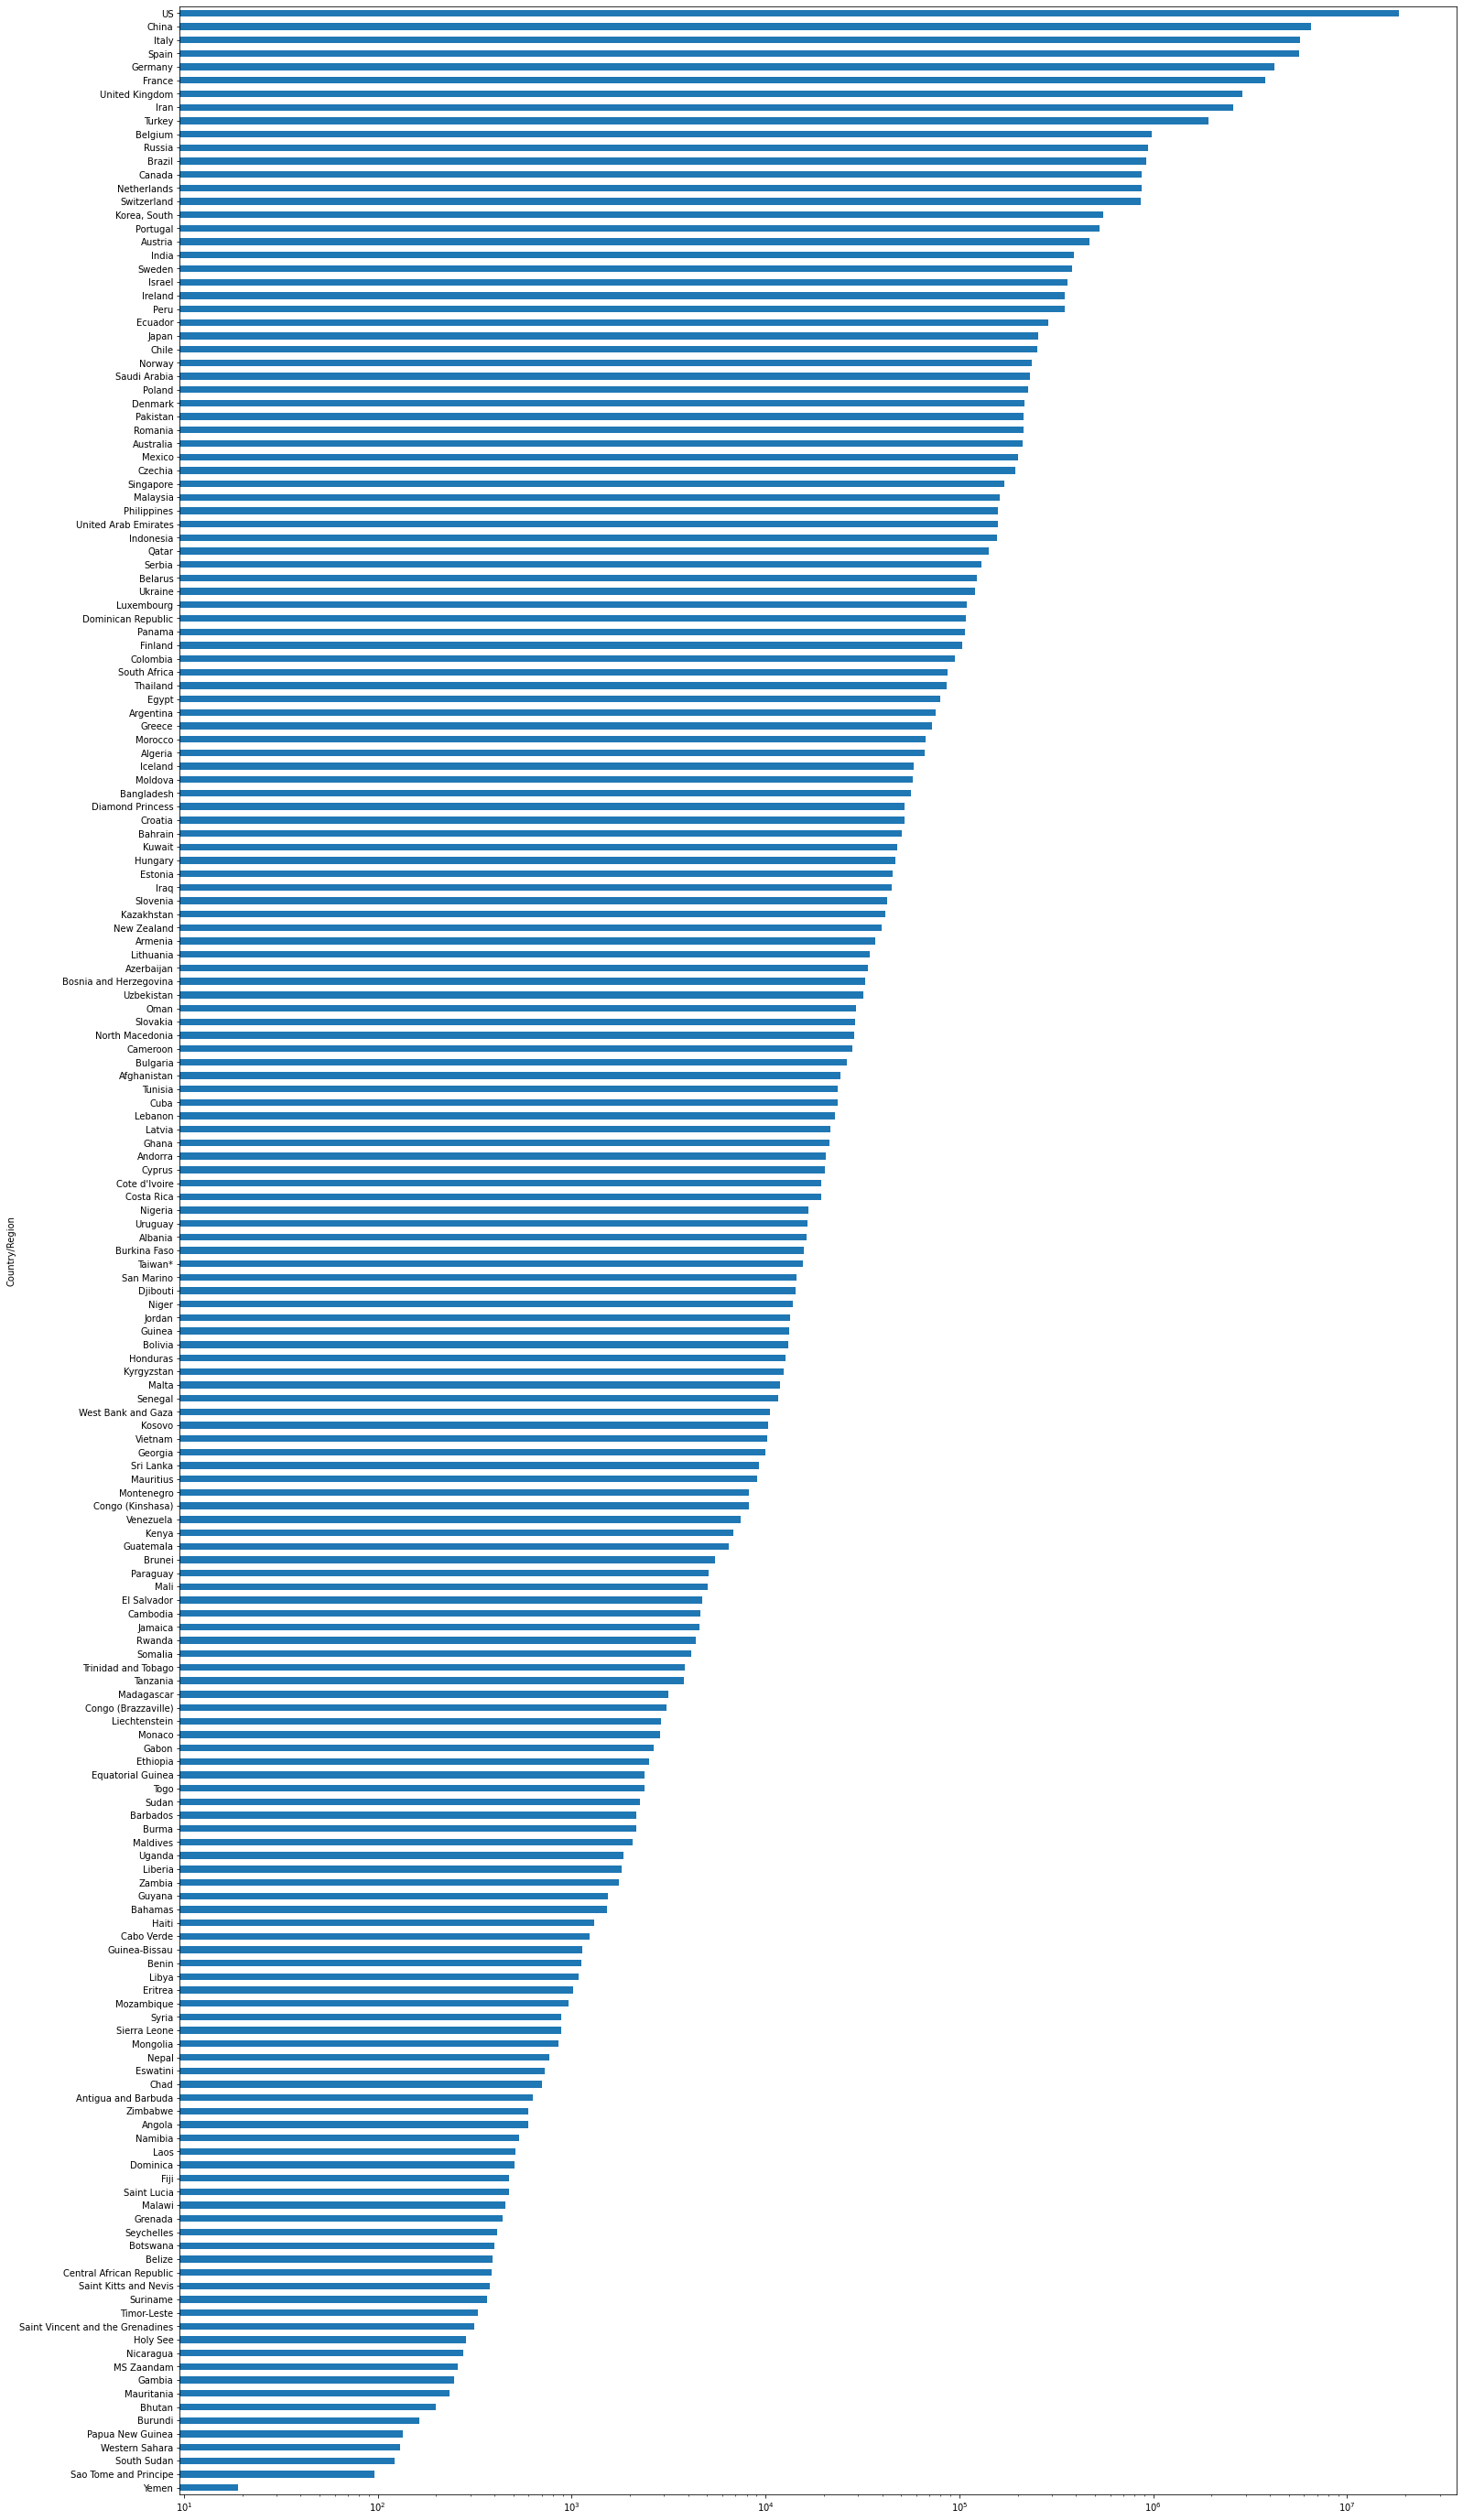

In [5]:
sumdata.plot.barh(figsize=(25,50))
plt.xscale("log")
plt.show()

# Studying the most effected countries since January

First, we're going to take a look at how the landscape has shifted over time via some animated bar graphs and, afterwards, we're going to explore the growth of cases per day in the US, Italy and China.

In [6]:
cumdata = data.cumsum(axis=1)

def draw_barchart(col):
    dff = cumdata.iloc[:,col].sort_values(ascending=True).tail(10)
    ax.clear()
    ax.barh(dff.index, dff.values)
    dx = dff.values.max() / 200
    for i, (value, name) in enumerate(zip(dff.values, dff.index)):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, list(df.columns)[col], transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'COVID cases by country since 22/1/2020',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    plt.box(False)

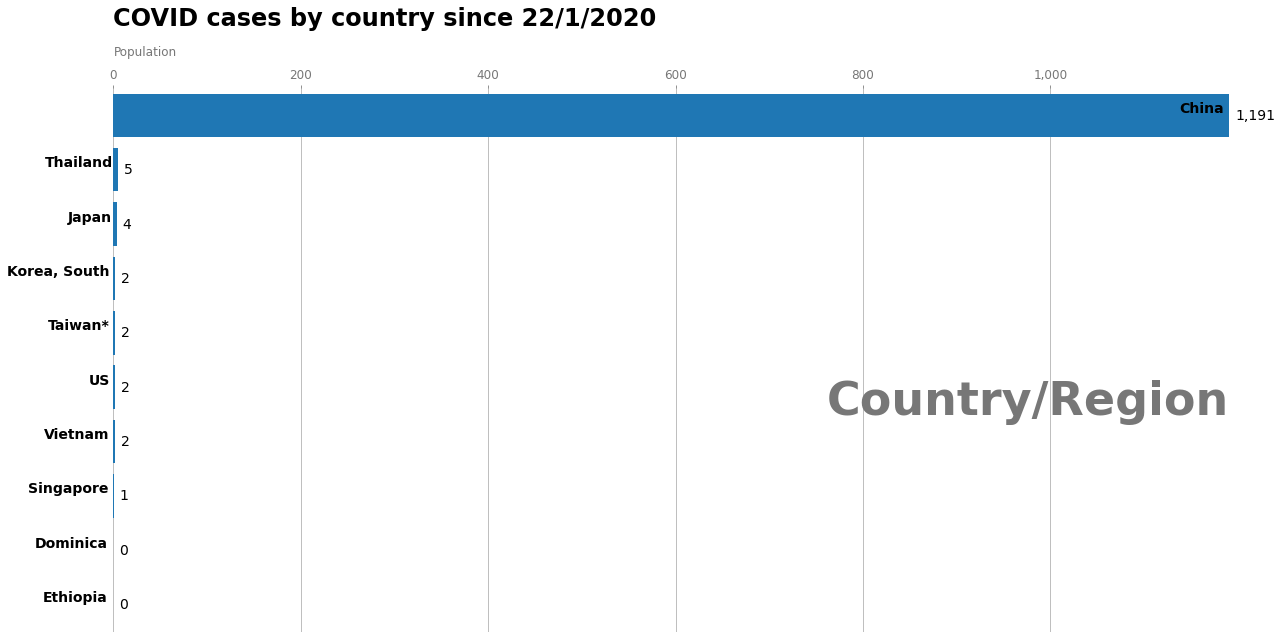

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1, 98))
HTML(animator.to_jshtml())

# United States

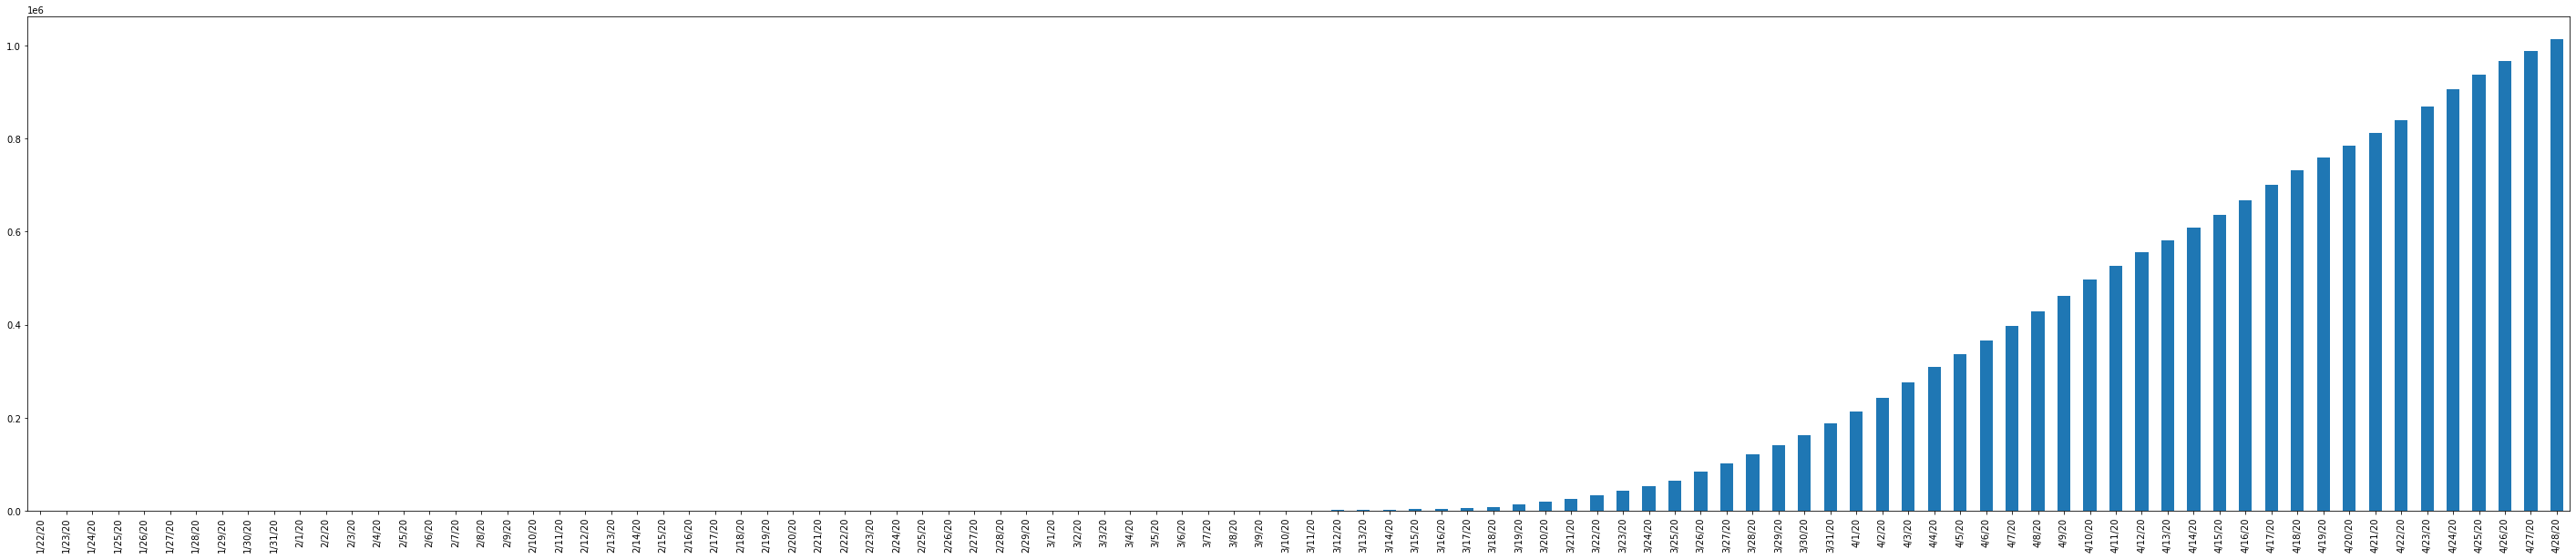

In [8]:
tempData = data.loc['US']
tempData.plot.bar(figsize=(50,10))
plt.show()

# China

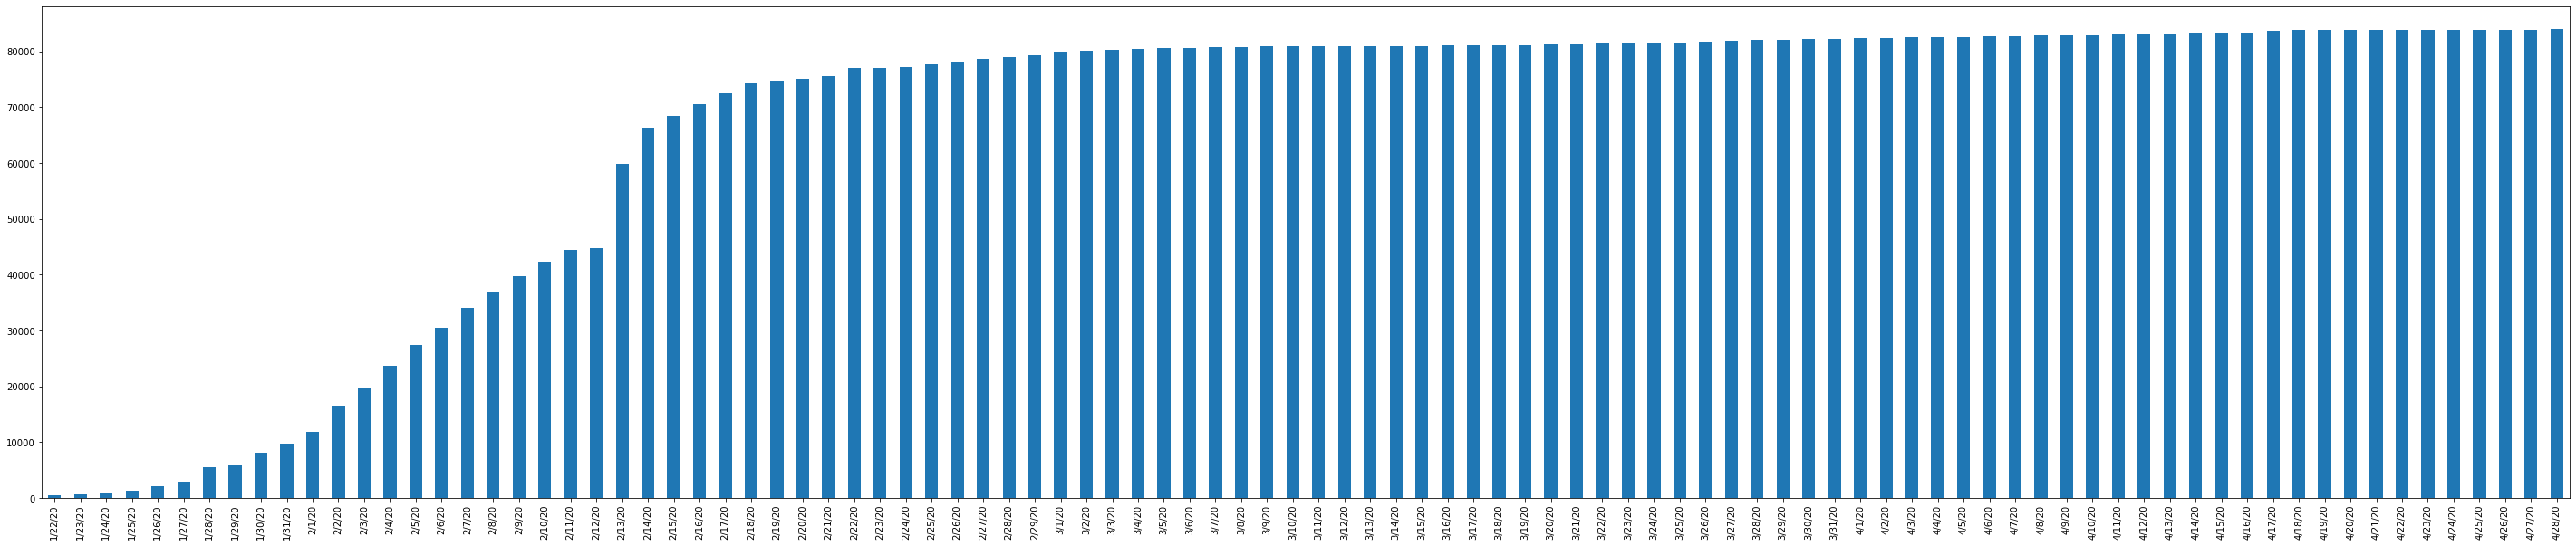

In [9]:
tempData = data.loc['China']
tempData.plot.bar(figsize=(50,10))
plt.show()

# Italy

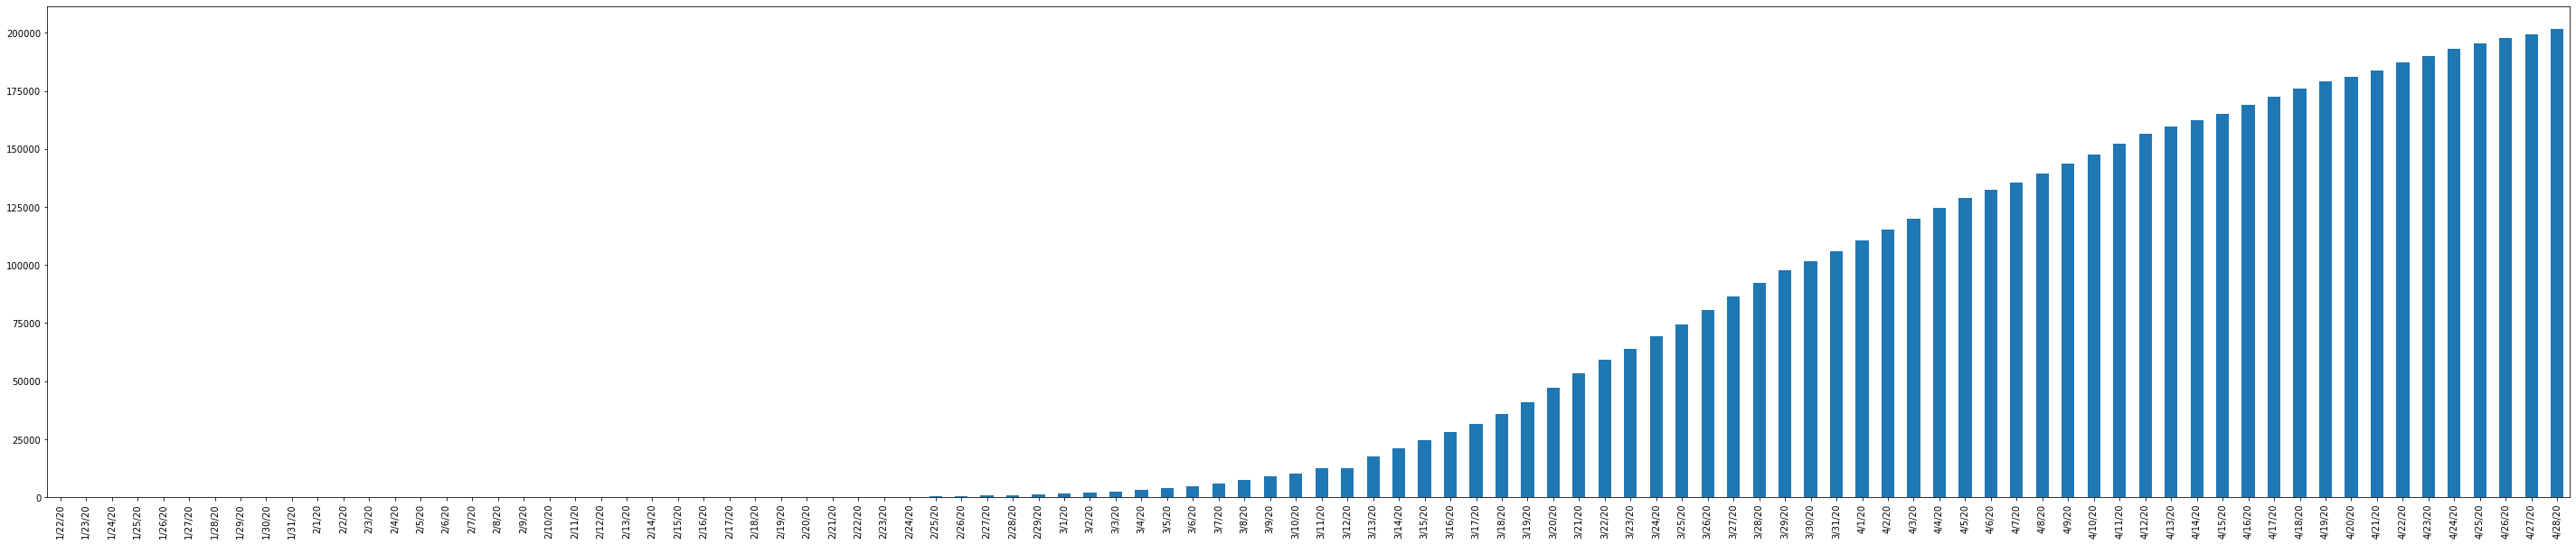

In [10]:
tempData = data.loc['Italy']
tempData.plot.bar(figsize=(50,10))
plt.show()

# QGIS

In [11]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'C:\\OSGeo4W64\\apps\\qgis\\python')
from qgis.core import *
QgsApplication.setPrefixPath("/usr/local", True) 
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice
i
qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

ModuleNotFoundError: No module named 'osgeo'

In [12]:
covid_gpkg = "covid-pt-2020-04-20.gpkg"
conn = ogr.Open(covid_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(covid_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))


NameError: name 'ogr' is not defined

In [13]:
concelho = QgsProject.instance().mapLayersByName('concelho')[0]
for c in concelho.getFeatures():
        print("Em {} há {} caso(s) confirmados".format(c["concelho"], c["confirmados_concelho_20/04/2020"]))

NameError: name 'QgsProject' is not defined

In [14]:
expr_sem_casos = QgsExpression( " \"confirmados_concelho_20/04/2020\" IS NULL " )
virgens = list(concelho.getFeatures( QgsFeatureRequest( expr_sem_casos ) ))
for c in virgens:
        print("Em {} não há pelos menos 3 casos confirmados".format(c["concelho"]))

NameError: name 'QgsExpression' is not defined

In [15]:
xt = concelho.extent()
# print(xt)
width  = 400
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([concelho])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()


NameError: name 'concelho' is not defined

In [16]:
from IPython.display import Image

In [17]:
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )

NameError: name 'QBuffer' is not defined